In [1]:
#check the versions of libraries
#python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas 
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


C:\Users\Christina\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Christina\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


scipy: 1.6.2
numpy: 1.19.5
matplotlib: 3.3.3
pandas: 1.2.4
sklearn: 0.24.2


In [2]:
#load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
dataset = pd.read_csv("Seventikidou.csv", names=['c1', 'c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','target'])

In [4]:
dataset.head()

c1       c2        c3      c4      c5      c6       c7      c8  \
0 -0.85267 -1.45620  0.009200  2.9835 -4.6574 -1.8244 -1.70740  2.8569   
1 -0.70609 -1.18940  0.035842 -1.4352  3.0562  4.1371  2.99950 -4.9441   
2 -1.41770  0.18245 -2.662900 -3.2049  1.6246 -2.6407  1.78690 -4.5054   
3 -0.62337 -0.30016 -0.243670 -0.4834  4.6658 -2.3149 -3.37480  2.1384   
4 -0.16734 -0.54598 -2.742100 -3.5769  1.1819  3.3010  0.73792 -1.2597   

       c9     c10     c11     c12     c13  target  
0  1.6469  2.0049  4.9421 -4.3874 -2.9963       1  
1  4.0802 -1.7481 -4.5583  1.8334 -3.8268       1  
2  4.6753  4.3815  4.8073  2.7658  1.0647       1  
3 -1.2494 -2.0428 -1.1142  2.7055 -2.4270       1  
4  4.1001  4.2872 -4.8623  2.3197  3.0338       1

In [5]:
dataset.shape

(1000, 14)

In [6]:
dataset.keys()

Index(['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11',
       'c12', 'c13', 'target'],
      dtype='object')

In [6]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   c1      1000 non-null   float64
 1   c2      1000 non-null   float64
 2   c3      1000 non-null   float64
 3   c4      1000 non-null   float64
 4   c5      1000 non-null   float64
 5   c6      1000 non-null   float64
 6   c7      1000 non-null   float64
 7   c8      1000 non-null   float64
 8   c9      1000 non-null   float64
 9   c10     1000 non-null   float64
 10  c11     1000 non-null   float64
 11  c12     1000 non-null   float64
 12  c13     1000 non-null   float64
 13  target  1000 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 109.5 KB


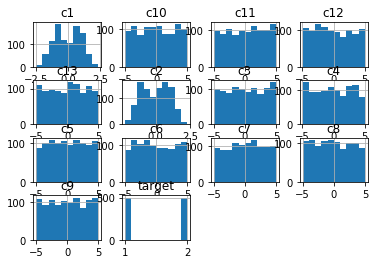

In [5]:
# histograms
dataset.hist()
plt.show()

Some of the features follow Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.



In [8]:
print(dataset.describe())

                c1           c2           c3           c4           c5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.029691    -0.007348     0.091605    -0.058814     0.042570   
std       1.010669     0.988749     2.935340     2.885626     2.847611   
min      -2.507700    -2.246700    -4.993500    -4.933900    -4.997400   
25%      -0.877192    -0.885460    -2.486675    -2.471350    -2.349625   
50%      -0.015580     0.065910     0.019638    -0.085999     0.053655   
75%       0.794050     0.847090     2.696700     2.456675     2.409775   
max       2.366800     2.303500     4.999300     4.996700     4.993600   

                c6           c7           c8           c9          c10  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.009173     0.092375    -0.133130     0.030006     0.017546   
std       2.911701     2.822377     2.854663     2.937877     2.882177   
min      -4.993400    -4.990900    -4

In [9]:
dataset.keys()

target
1    500
2    500
dtype: int64


In [7]:
array=dataset.values
X = array[:,0:13]
Y = array[:,13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [9]:
from sklearn.model_selection import KFold

# First look

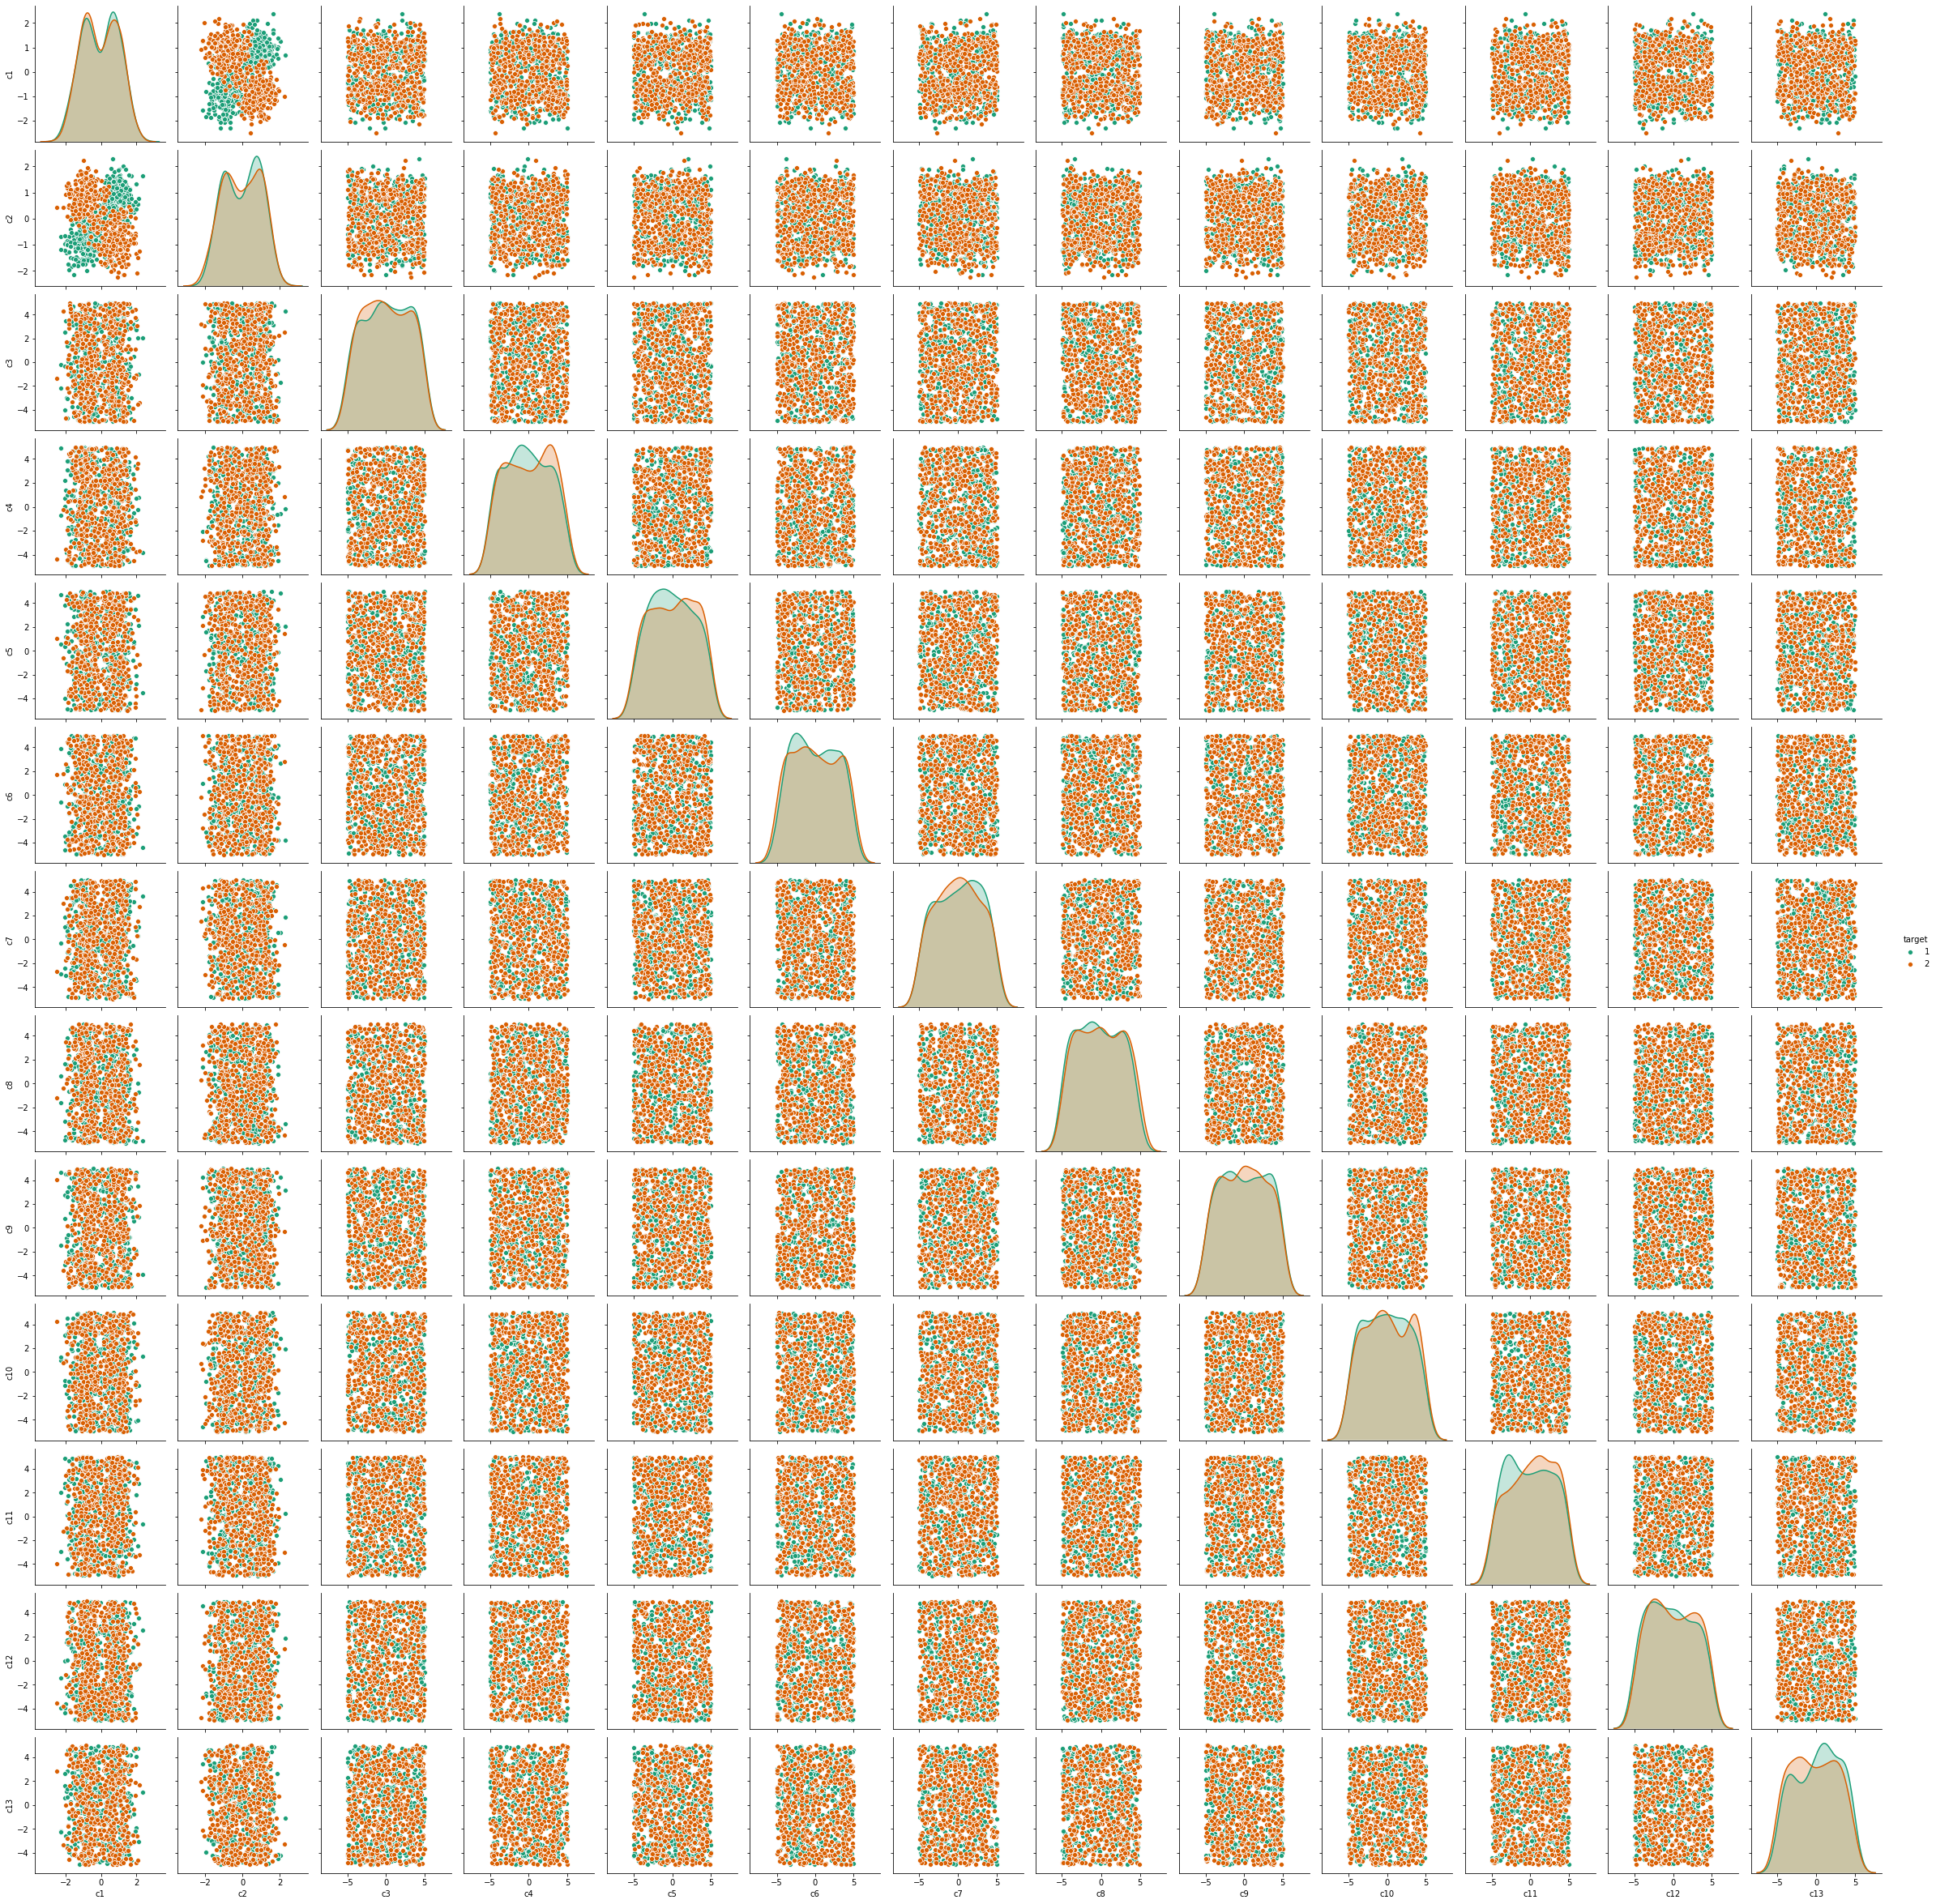

In [16]:
import seaborn as sns
sns.pairplot(dataset,hue='target',palette='Dark2')

In [10]:
#create classifiers without care for hyperparameters to observe the results.
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=10) #use 10 cross fold validation in the entire dataset & metric accuracy
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.367000 (0.056754)
DT: 0.736000 (0.085697)
NB: 0.076000 (0.075789)
SVM: 0.044000 (0.021071)


In [8]:
# Evaluating and predicting models

for name,model in models:
    trainedmodel = model.fit(X_train,Y_train)
    
    # prediction
    Y_pred = trainedmodel.predict(X_test)
    
    acc = accuracy_score(Y_test,Y_pred)
    classreport = classification_report(Y_test,Y_pred)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))


****************************KNN
The accuracy: 0.505
The Classification Report:
               precision    recall  f1-score   support

         1.0       0.49      0.55      0.52        96
         2.0       0.53      0.46      0.49       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200


****************************DT
The accuracy: 0.515
The Classification Report:
               precision    recall  f1-score   support

         1.0       0.49      0.50      0.50        96
         2.0       0.53      0.53      0.53       104

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.52      0.52      0.52       200


****************************NB
The accuracy: 0.535
The Classification Report:
               precision    recall  f1-score   support

         1.0       0.52      0.51      0.51       

# Until now NB is the best. 
But 0.54 is not so good accuracy!

# KNN hyperparameter tuning, scaling & visualization

Firstly we will gone do some scalling. We will try Robust, Standard and MinMax Scaler.

In [12]:
#Create copy of dataset.
df_model = dataset.copy()
#select a scale method
#scaler = RobustScaler()
scaler = StandardScaler()
#scaler = MinMaxScaler()
features = [['c1', 'c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

array=df_model.values
x = array[:,0:13]
y = array[:,13]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

#Create KNN Object
# search for an optimal value of K for KNN
# list of integers 1 to 10 we want to try
k_range = range(1, 5)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    print(scores)
    k_scores.append(scores.mean())
print(k_scores)

[0.69 0.53 0.68 0.75 0.64 0.68 0.75 0.6  0.77 0.55]
[0.66 0.57 0.6  0.68 0.6  0.6  0.69 0.56 0.71 0.58]
[0.67 0.63 0.64 0.69 0.6  0.66 0.78 0.61 0.72 0.62]
[0.57 0.6  0.62 0.7  0.62 0.58 0.73 0.64 0.71 0.6 ]
[0.6639999999999999, 0.625, 0.662, 0.637]


In [7]:
#So finally we train a model based to these and evaluate the model
knnfinal = KNeighborsClassifier(n_neighbors=9, p=1)
knnfinal.fit(x_train,y_train)
y_predfinal = knnfinal.predict(x_test)
print('KNNfinalscore:')
print(accuracy_score(y_test, y_predfinal))

0.675


# CHECK WITH REBUST SEEMS GOOD

We see that for k=7 we have accuracy 0,697, the same good for k=9 Neighbors. This is logic, if we think that we have 1000 records so we expected k to be closer to 9(big k)! In the predict part we have accuracy 0.675 which is much better than 0.51 that we had.

Text(0, 0.5, 'Cross-Validated Accuracy')

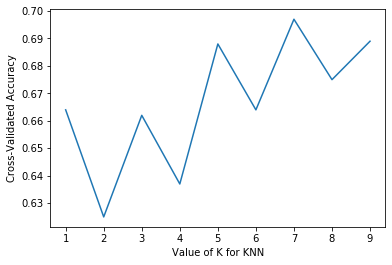

In [11]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

From the plot, we see also that for k=7 we have the max accuracy. 

 What happens if we also change also p parameter for the distance that we use to calculate between data or the leaf size?

# Let's use GridSearch

In [15]:
#gridsearchcv
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
              'p': [1, 2, 5]}
#define a dictionary of KNN parameters for the grid search. Here, we will consider K values between 3 and 7 
#and  p  values of 1 (Manhattan), 2 (Euclidean), and 5 (Minkowski).

gs_KNN = GridSearchCV(estimator=knn, 
                      param_grid=params_KNN, 
                      cv=10,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

In [16]:
gs_KNN.fit(x, y); #fit a KNN model using the full dataset.

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.2min finished


In [17]:
gs_KNN.best_params_ #To get the best parameter values, we call the best_params_ attribute.

{'n_neighbors': 9, 'p': 1}

In [18]:
gs_KNN.best_score_

0.705

# With k=9 and p=1 (Manhattan) we have accuracy=0.705!

So, if we go back, and add also to the parameters p=1 we see that indeed accuracy is 0.705 for k=9!

Let's visualize the hyperparameter tuning results from the cross-validation. We define a data frame by combining gs.cv_results_['params'] and gs.cv_results_['mean_test_score']. The gs.cv_results_['params'] is an array of hyperparameter combinations.

In [19]:
gs_KNN.cv_results_['mean_test_score']
#To extract more cross-validation results, we can call gs.csv_results - 
#a dictionary consisting of run details for each fold.
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN


n_neighbors  p  test_score     metric
0             1  1       0.657  Manhattan
1             1  2       0.664  Euclidean
2             1  5       0.617  Minkowski
3             2  1       0.602  Manhattan
4             2  2       0.625  Euclidean
5             2  5       0.618  Minkowski
6             3  1       0.655  Manhattan
7             3  2       0.662  Euclidean
8             3  5       0.620  Minkowski
9             4  1       0.639  Manhattan
10            4  2       0.637  Euclidean
11            4  5       0.612  Minkowski
12            5  1       0.681  Manhattan
13            5  2       0.688  Euclidean
14            5  5       0.642  Minkowski
15            6  1       0.667  Manhattan
16            6  2       0.664  Euclidean
17            6  5       0.631  Minkowski
18            7  1       0.697  Manhattan
19            7  2       0.697  Euclidean
20            7  5       0.654  Minkowski
21            8  1       0.697  Manhattan
22            8  2       0.675  Euclidean
23            8  5       0.638  Minkowski
24            9  1       0.705  Manhattan
25            9  2       0.689  Euclidean
26            9  5       0.650  Minkowski

In [20]:
import altair as alt

alt.Chart(results_KNN, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='metric'
)

alt.Chart(...)

So, we see that also in the graph!

Bingo! (We could improve it more with further analysis)

so, results are:
1. p = 1, this is equivalent to using manhattan_distance.
2. Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
3. neighbors= 37 
and the accuracy then is 0.78!!!This is normal, as we have a lot of observations, we need more nearest neibours FOR BETTER RESULT!!!

In [22]:
print(classification_report(y_test, y_pred)) #New Classification Report

              precision    recall  f1-score   support

         1.0       0.63      0.61      0.62        96
         2.0       0.65      0.67      0.66       104

    accuracy                           0.65       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.64      0.65      0.64       200



# Gaussian Naive Bayes hyperparameter tuning

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
#select a scale method
scaler = RobustScaler()
#scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create a Gaussian Classifier
gnb = GaussianNB(priors=[0.5, 0.5])

#Train the model using the training sets
gnb.fit(X_train_scaled, Y_train)

#Predict the response for test dataset
y_pred_gnb = gnb.predict(X_test_scaled)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of Naive Bayes:",metrics.accuracy_score(Y_test, y_pred_gnb))

Accuracy: 0.53


In [11]:
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4,1,5] 

nscores =[]
for step in steps:
    gnb = GaussianNB(priors=[0.5, 0.5], var_smoothing=step)
    scores1 = cross_val_score(gnb, X_train_scaled, Y_train, cv=10, scoring='accuracy')        
    nscores.append(scores1.mean())
print(nscores)

[0.5225, 0.5225, 0.5225, 0.5225, 0.5225, 0.52, 0.535]


In [54]:
#Train the model
gnbfinal = GaussianNB(priors=[0.5, 0.5], var_smoothing=5)
gnbfinal.fit(X_train_scaled, Y_train)

#Predict the response for test dataset
y_pred_gnb = gnbfinal.predict(X_test_scaled)
# Model Accuracy, how often is the classifier correct?
print("Accuracy of NB final:",metrics.accuracy_score(Y_test, y_pred_gnb))

Accuracy: 0.535


##### In the dataset before processing accuracy for GNB is 0.525 

# SVM with linear kernel

Let’s create a Linear Kernel SVM using the sklearn library of Python and the Iris Dataset that can be found in the dataset library of Python.

Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used.
1. Training a SVM with a Linear Kernel is Faster than with any other Kernel.

2. When training a SVM with a Linear Kernel, only the optimisation of the C Regularisation parameter is required. 

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. 

In [12]:
#create classifier 
from sklearn import svm
from sklearn import metrics

ls_scores = []
cs = [0.1, 1, 10, 100, 1000]
#cs = [1, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 100]

for c in cs:
    linear_svc = svm.SVC(kernel='linear', C=c)
    
    scores = cross_val_score(linear_svc, X_train_scaled, Y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores list
    ls_scores.append(scores.mean())
print(ls_scores)



[0.52875, 0.5387500000000001, 0.5375, 0.535, 0.535]


In [17]:
#Training the model
finallinear_svc = svm.SVC(kernel='linear', C=1)

finallinear_svc.fit(X_train_scaled, y_train)
#Predict testing set
Y_pred = finallinear_svc.predict(X_test_scaled)
#Check performance using accuracy
print('Accuracy of SVM linear final:',accuracy_score(Y_test, Y_pred))


0.515


We see that there are not many differences for change of C! lets try keep it 1.

0.52 is the final score!

# SVM with RBF kernel

In [56]:
from sklearn import svm

gammas = [0.1, 1, 10, 100]

rbf_scores = []


for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma)
    
    scores = cross_val_score(svc, X_train_scaled, Y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores l
    rbf_scores.append(scores.mean())
print(rbf_scores)

[0.7849999999999999, 0.7775000000000001, 0.505, 0.505]


It's obvious that gamma=0.1 is the best!0.80 is good! So we keep this!

In [59]:
#Training the model
svc = svm.SVC(kernel='rbf', gamma=0.2)
svc.fit(X_train_scaled, y_train)
#Predict testing set
Y_pred = svc.predict(X_test_scaled)
#Check performance using accuracy
print('Accuracy of svm rbf:',accuracy_score(Y_test, Y_pred))

0.78


For gamma =0.2 lets search the best C!

In [61]:
rbf_scores = []

cs = [1, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 100]

for c in cs:
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.2, C=c)
    
    scores = cross_val_score(rbf_svc, X_train_scaled, Y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores list
    rbf_scores.append(scores.mean())
print(rbf_scores)


[0.8125, 0.8099999999999999, 0.8099999999999999, 0.8112499999999999, 0.8099999999999999, 0.80625, 0.8024999999999999, 0.80375, 0.8049999999999999, 0.8025, 0.8012499999999999, 0.7875]


In [66]:
#Training the model
svcfinal = svm.SVC(kernel='rbf', gamma=0.2, C=0.2)
svcfinal.fit(X_train_scaled, y_train)
#Predict testing set
Y_predsvcfinal = svc.predict(X_test_scaled)
#Check performance using accuracy
print('Accuracy of SVM rbf final:'accuracy_score(Y_test, Y_predsvcfinal))

0.78


# Decision trees

In [71]:
de = [3, 7, 10, 20, 35,45,60,70,100]
clf_scores = []

for d in de:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=d)
    
    scores = cross_val_score(clf, X_train_scaled, Y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores list
    clf_scores.append(scores.mean())
print(clf_scores)

[0.51, 0.5237499999999999, 0.61625, 0.6174999999999999, 0.62875, 0.6275, 0.64625, 0.6275, 0.62375]


In [19]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(criterion="entropy", max_depth=20)

clf = clf.fit(X_train_scaled,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)
print("Accuracy of decision trees final:",metrics.accuracy_score(y_test, y_pred))

Accuracy of decision trees final: 0.625


max_depth 21,23,22 and around 20 are good values!

So, in comparison.. best in data fits SVM with radial kernel, then decision trees, then knn and then SVM with linear kernel(we expected it, data are very difficult and non linear) and naive bayes!